In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
movies =r"D:\Jupyter Notebook\advertising.csv"
df = pd.read_csv(movies, encoding="latin1")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
print("Missing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Statistical Summary:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
for col in ['TV', 'Radio', 'Newspaper', 'Sales']:
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower, upper)

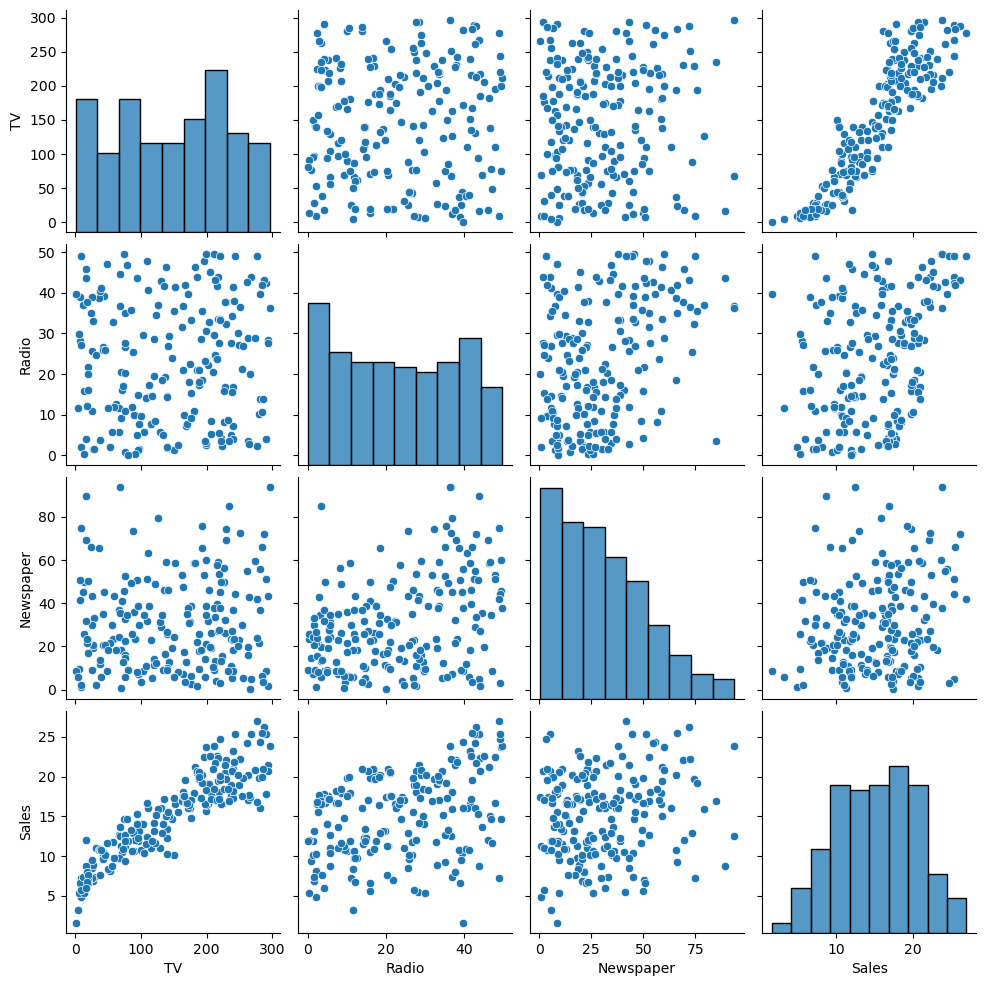

In [6]:
sns.pairplot(df)
plt.show()

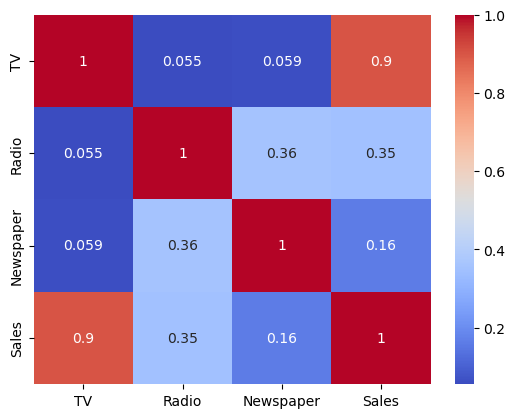

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
# Feature Engineering

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
#selection hyperparameter tuning

In [13]:
param_grid = {'alpha': [0.1, 1, 10]}
ridge_best = GridSearchCV(ridge, param_grid, cv=5).fit(X_train, y_train).best_estimator_
lasso_best = GridSearchCV(lasso, param_grid, cv=5).fit(X_train, y_train).best_estimator_

In [15]:
ensemble = VotingRegressor([('ridge', ridge_best), ('lasso', lasso_best), ('rf', rf), ('gb', gb)])
ensemble.fit(X_train, y_train)
# Ensemble Learning

VotingRegressor(estimators=[('ridge', Ridge(alpha=0.1)),
                            ('lasso', Lasso(alpha=0.1)),
                            ('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor())])

In [16]:
y_pred = ensemble.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R2 Score: {r2:.3f}')
#mode evaluation

MAE: 0.733, MSE: 1.146, RMSE: 1.071, R2 Score: 0.963


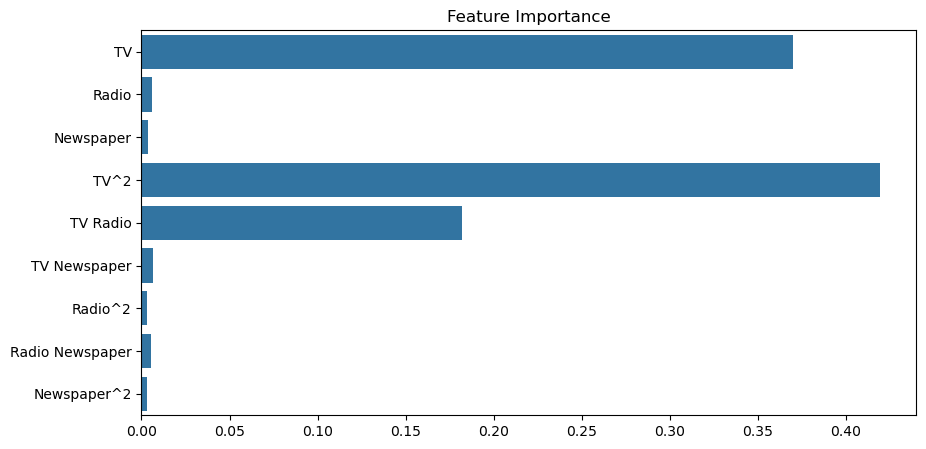

In [18]:
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
feature_names = poly.get_feature_names_out(['TV', 'Radio', 'Newspaper'])
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance')
plt.show()